In [456]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random
import seaborn as sns
from scipy.stats import multivariate_normal
from numpy.linalg import inv
from random import uniform

In [457]:
def generate_n_test_points(n):
    x_coordinates=[]
    for i in range(n):
        x_coordinates.append(uniform(0.00, 1.00))
    x_coordinates=sorted(x_coordinates)
    return x_coordinates

In [458]:
def gaussian_function(x,mean,variance):
  mu=mean
  sigma=math.sqrt(variance)
  y=(1/(sigma*math.sqrt(2*np.pi)))*((np.exp([1])[0])**(-0.5*(((x-mu)/sigma)**2)))
  return y

In [459]:
def generate_n_points_with_gaussian_noise(n):
    x_coordinates=[]
    for i in range(n):
        x_coordinates.append(uniform(0.00, 1.00))
    x_coordinates=sorted(x_coordinates)
    y_coordinates=[]
    for x in x_coordinates:
        gaussian_noise=np.random.normal(0,0.01)
        y= math.sin(2*np.pi*x)+gaussian_noise
        y_coordinates.append(y)
    return x_coordinates,y_coordinates

In [460]:
def kernel_function(x_query,x_n,x,variance):
    sigma=math.sqrt(variance)
    s=0
    for i in range(len(x)):
        s = s + gaussian_function(x_query-x[i],0,sigma**2) 
    return ((gaussian_function(x_query-x_n,0,sigma**2)) / s)

# This returns mean,var in t|x
def kernel_regression(x,t,x_query,variance):
    s1=0
    s2=0
    sigma=math.sqrt(variance)
    for i in range(len(x)):
        s1 = s1 + kernel_function(x_query,x[i],x,sigma**2) * t[i]
        s2 = s2 + kernel_function(x_query,x[i],x,sigma**2) * (t[i] ** 2)    
    return s1,sigma**2 + s2-(s1**2)

In [461]:
x_train,y_train=generate_n_points_with_gaussian_noise(10) 

<AxesSubplot:>

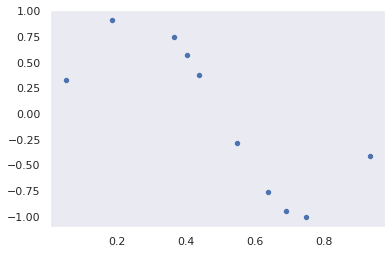

In [462]:
sns.scatterplot(x=x_train,y=y_train)

<AxesSubplot:>

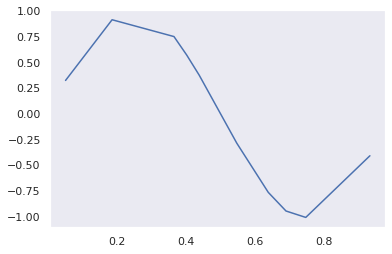

In [463]:
sns.lineplot(x=x_train,y=y_train)

In [464]:
x_test=generate_n_test_points(100)

In [465]:
def call_kernel_regresssion_with_different_variances(x_train,y_train,x_test,sigma):
    y_predicted=[]
    mu_list=[]
    var_list=[]
    variance = sigma**2
    for i in range(len(x_test)):
        mu,var = kernel_regression(x_train,y_train,x_test[i],variance)
        y_predicted.append(mu)
        mu_list.append(mu)
        var_list.append(var)
    return mu_list,var_list

In [466]:
def plotter(x_train,y_train,x_test,mu_list,var_list,a,b,axs,sigma):
        x_train = np.array(x_train)
        y_train=np.array(y_train)
        mu_list = np.array(mu_list)
        var_list = np.array(var_list)
        up_limit = mu_list+2*var_list
        low_limit= mu_list-2*var_list
        y_test = []
        for i in range(len(x_test)):
                y_test.append(np.sin(2*np.pi*x_test[i]))
        axs[a][b].plot(x_test,y_test,color="green",label='true')
        axs[a][b].plot(x_test,mu_list,color='red',label='mean')
        axs[a][b].fill_between(x_test,up_limit,low_limit, alpha = 0.1, color='BLUE')
        if x_train is not None:
                axs[a][b].plot(x_train, y_train, 'rx')
        c= "sigma = "+ str(sigma)
        axs[a][b].set_title(c)

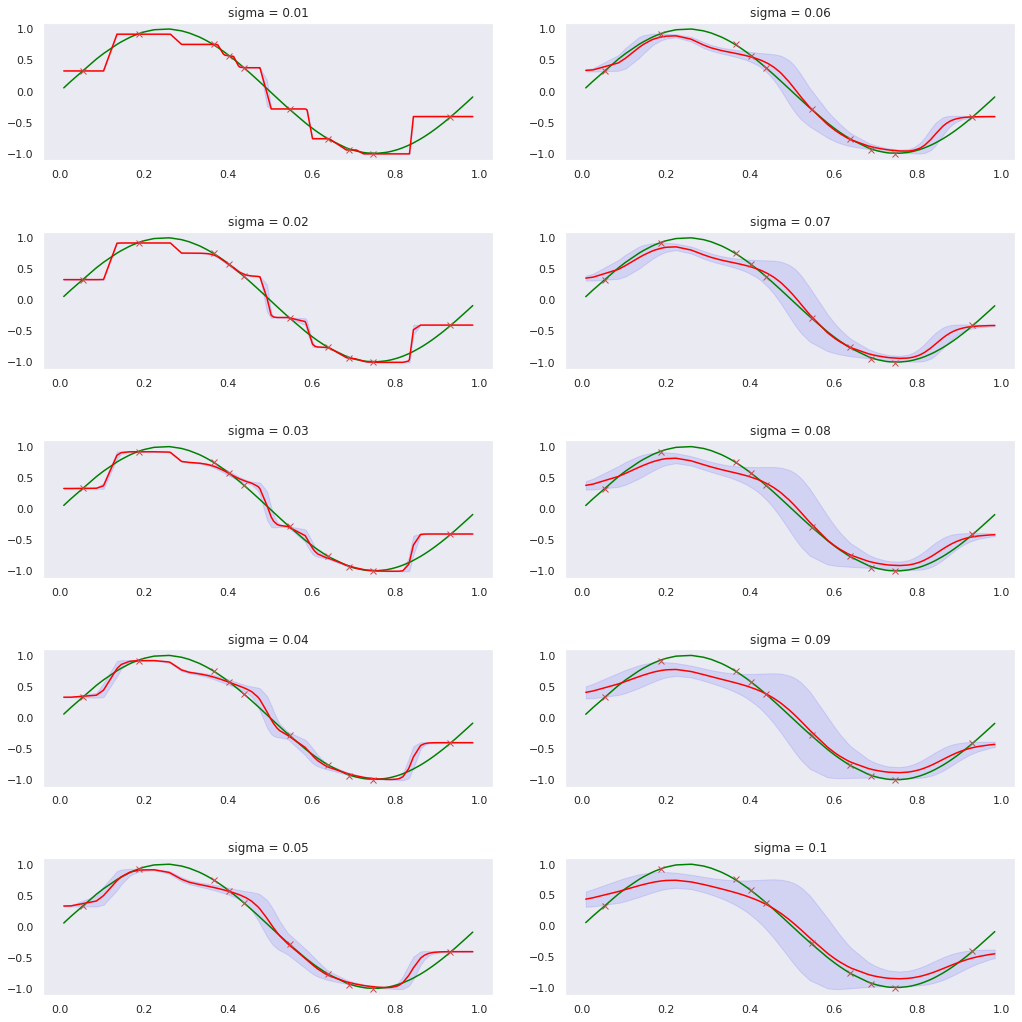

In [467]:
sigmas = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08 , 0.09, 0.1]
fig,axs = plt.subplots(5,2)
for  i in range(len(sigmas)):
    mu_list,var_list=call_kernel_regresssion_with_different_variances(x_train,y_train,x_test,sigmas[i])
    if(i<5):
        plotter(x_train,y_train,x_test,mu_list,var_list,i,0,axs,sigmas[i])
    else:
        plotter(x_train,y_train,x_test,mu_list,var_list,i-5,1,axs,sigmas[i])
fig.set_figheight(15)
fig.set_figwidth(15) 
fig.tight_layout(pad=3.0)   